In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [2]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
digitos['data'][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

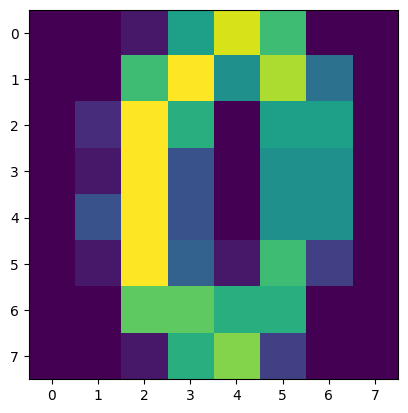

In [5]:
plt.imshow(digitos['data'][10].reshape(8,8))

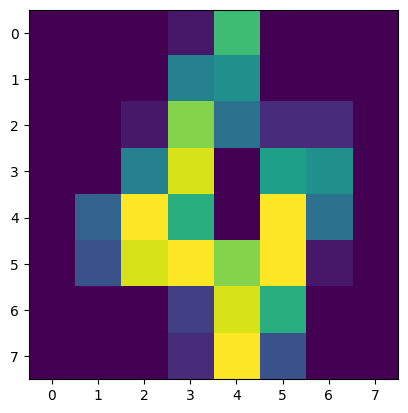

In [6]:
plt.imshow(digitos.images[4])

In [7]:
X = digitos.data

In [8]:
X = X / 16.0

In [9]:
X_entrena, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

In [10]:
imagen_entrada = Input(shape=(64, ))

In [11]:
codificado = Dense(32, activation = 'relu') (imagen_entrada)

In [12]:
decodificado = Dense(64, activation='sigmoid') (codificado)

In [13]:
autoencoder = Model(imagen_entrada, decodificado)

In [14]:
autoencoder.compile(optimizer='adam', #!optimizador de pesos, para minimizar las diferencias entre las entradas originales y las reconstruidas, medida por la funcion de perdida de entropia crusada binaria durante el entrenamiento
                    loss='binary_crossentropy')

In [15]:
autoencoder.fit(X_entrena,
                X_entrena,
                epochs=100, #!numero de veces que se va a repasar todo el conjunto de datos de entrenamiento
                batch_size = 256, #! numero de registros que se van a procesar en cada paso
                shuffle = True, #!mezclar los datos antes de cada epoca
                validation_data = (X_prueba, X_prueba))#!validacion de los datos de prueba

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.7153 - val_loss: 0.6969
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6913 - val_loss: 0.6752
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.6696 - val_loss: 0.6538
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6476 - val_loss: 0.6303
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6233 - val_loss: 0.6036
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5951 - val_loss: 0.5741
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5657 - val_loss: 0.5434
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5344 - val_loss: 0.5136
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5040 - val_loss: 0.4868
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.4794 - val_loss: 0.4648
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4599 - val_loss: 0.4479
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4424 - val_lo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


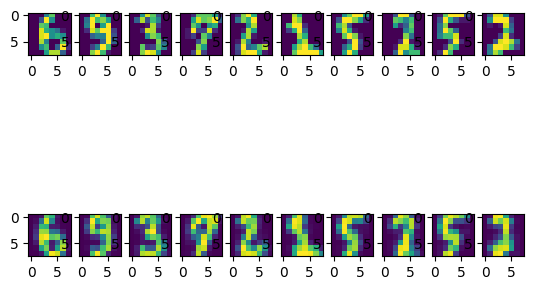

In [16]:
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_prueba[i].reshape(8,8)) #!imagenes de prueba

    plt.subplot(2, 10, i+1+10)
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8,8)) #!imagenes reconstruidas